# Representing Qubit States

In this chapter 1.3 we will learn how to represent Qubit states in the **Qiskit** framework for quantum computers/systems. We will understand that these systems are able to process and/or manipulate a larger amount of information given their vector/tensor based operations, but also their ability to operate between spaces of several dimensions.

From the textbook: *" In quantum computers, our basic variable is the qubit: a quantum variant of the bit. These have exactly the same restrictions as normal bits do: they can store only a single binary piece of information, and can only ever give us an output of 0 or 1. However, they can also be manipulated in ways that can only be described by quantum mechanics. This gives us new gates to play with, allowing us to find new ways to design algorithms.
   To fully understand these new gates, we first need to understand how to write down qubit states. For this we will use the mathematics of vectors, matrices, and complex numbers."* 

## Classical vs Quantum bits

In quantum physics basic operations are done with vectors/tensors. The most basic operations are carried out to obtain what is called a *statevector*. In classical mechanics we can also operate with vectors, but usually these only allow for a limited set of operations, a magnitude, a direction or a coordinate pair. But for quantum systems we can extend this to what we call a *state* of a system. In a *state* we represent our vector as a *matrix* of values. This allows for multidimensional operations.

Consider the example from the textbook where we could represent the state of car running in a unidimensional road with some specified direction and instataneous velocity. In a classical represenation of bits this could be a single number (the specific position of the car) giving us the information required: 

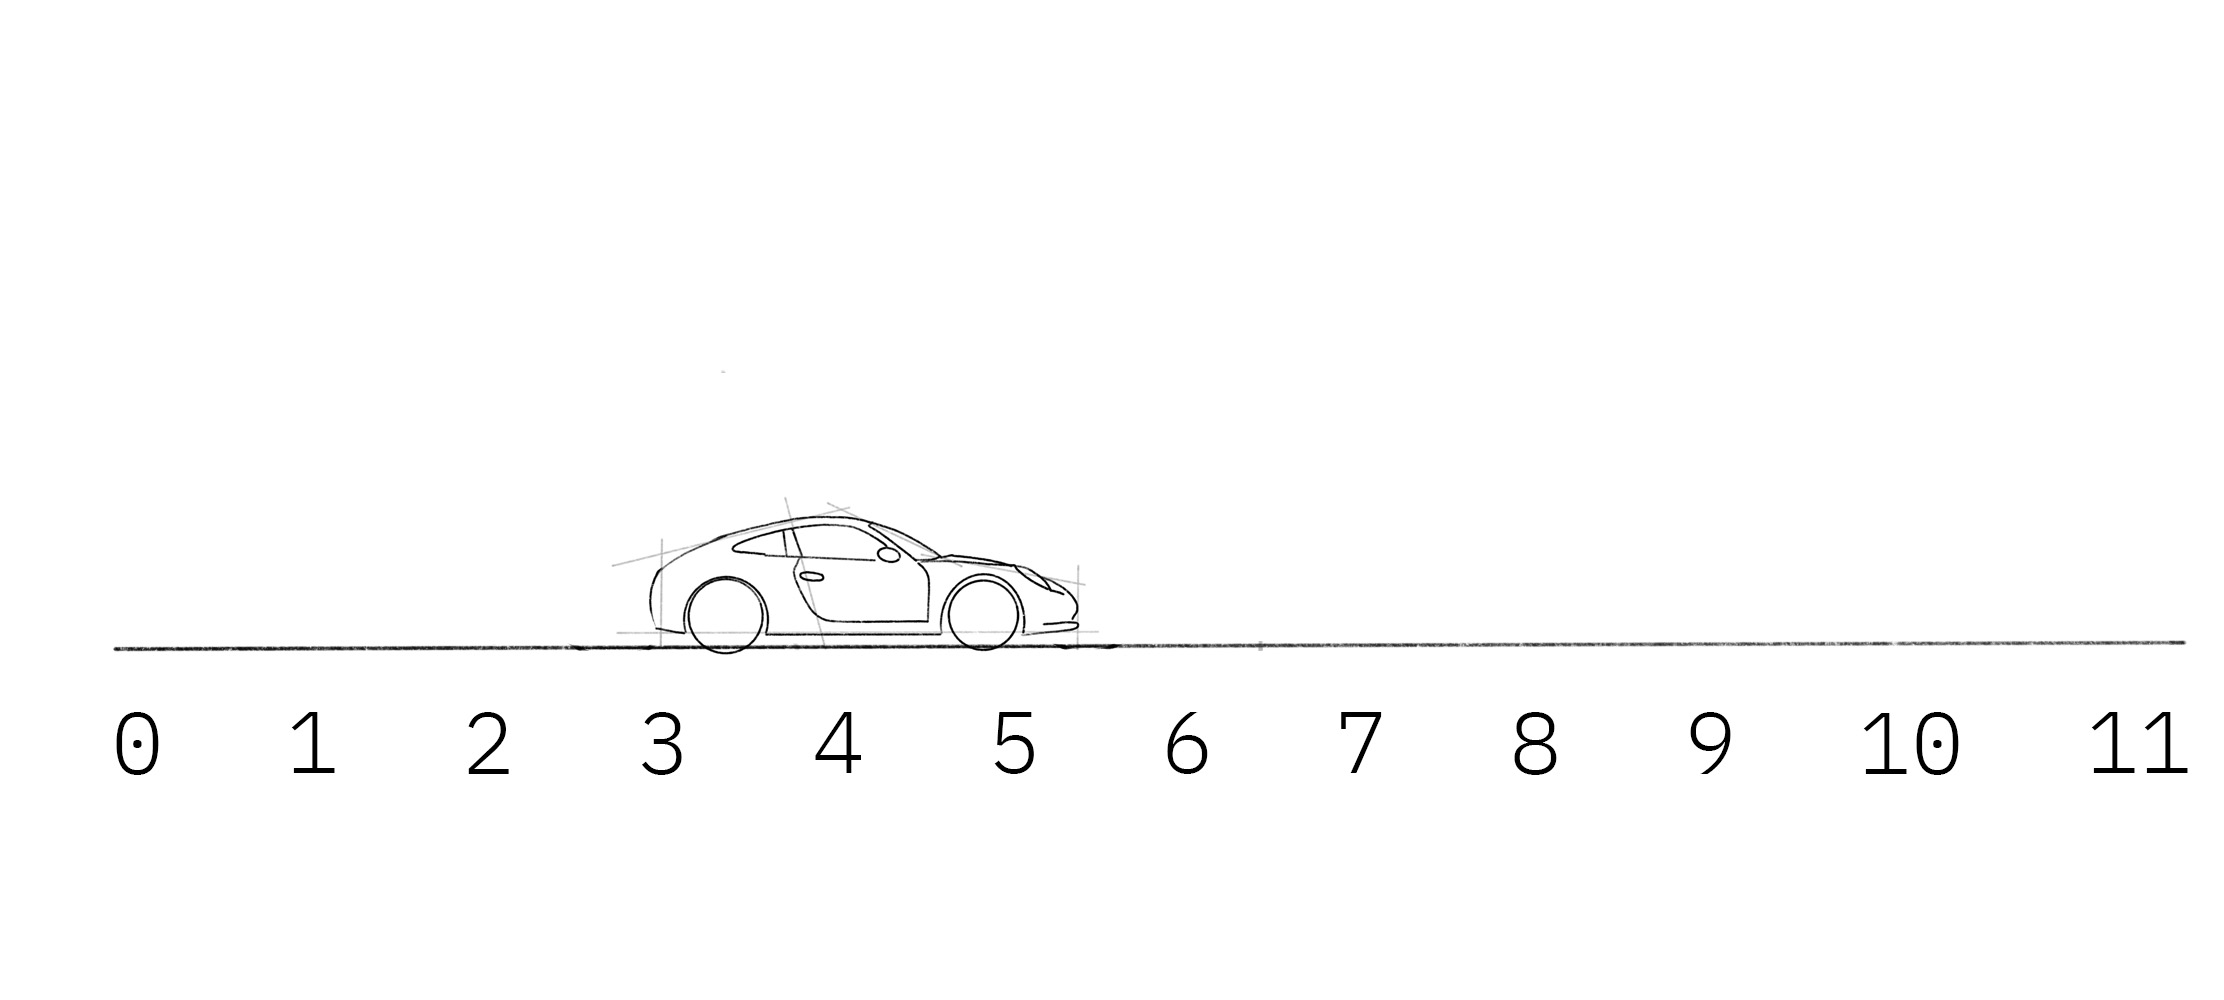  

*" In quantum physics we use statevectors to describe the state of our system. Say we wanted to describe the position of a car along a track, this is a classical system so we could use a number **x**. 


For the quantum way of representing the same information we think of probability of finding the car in a specified position. 

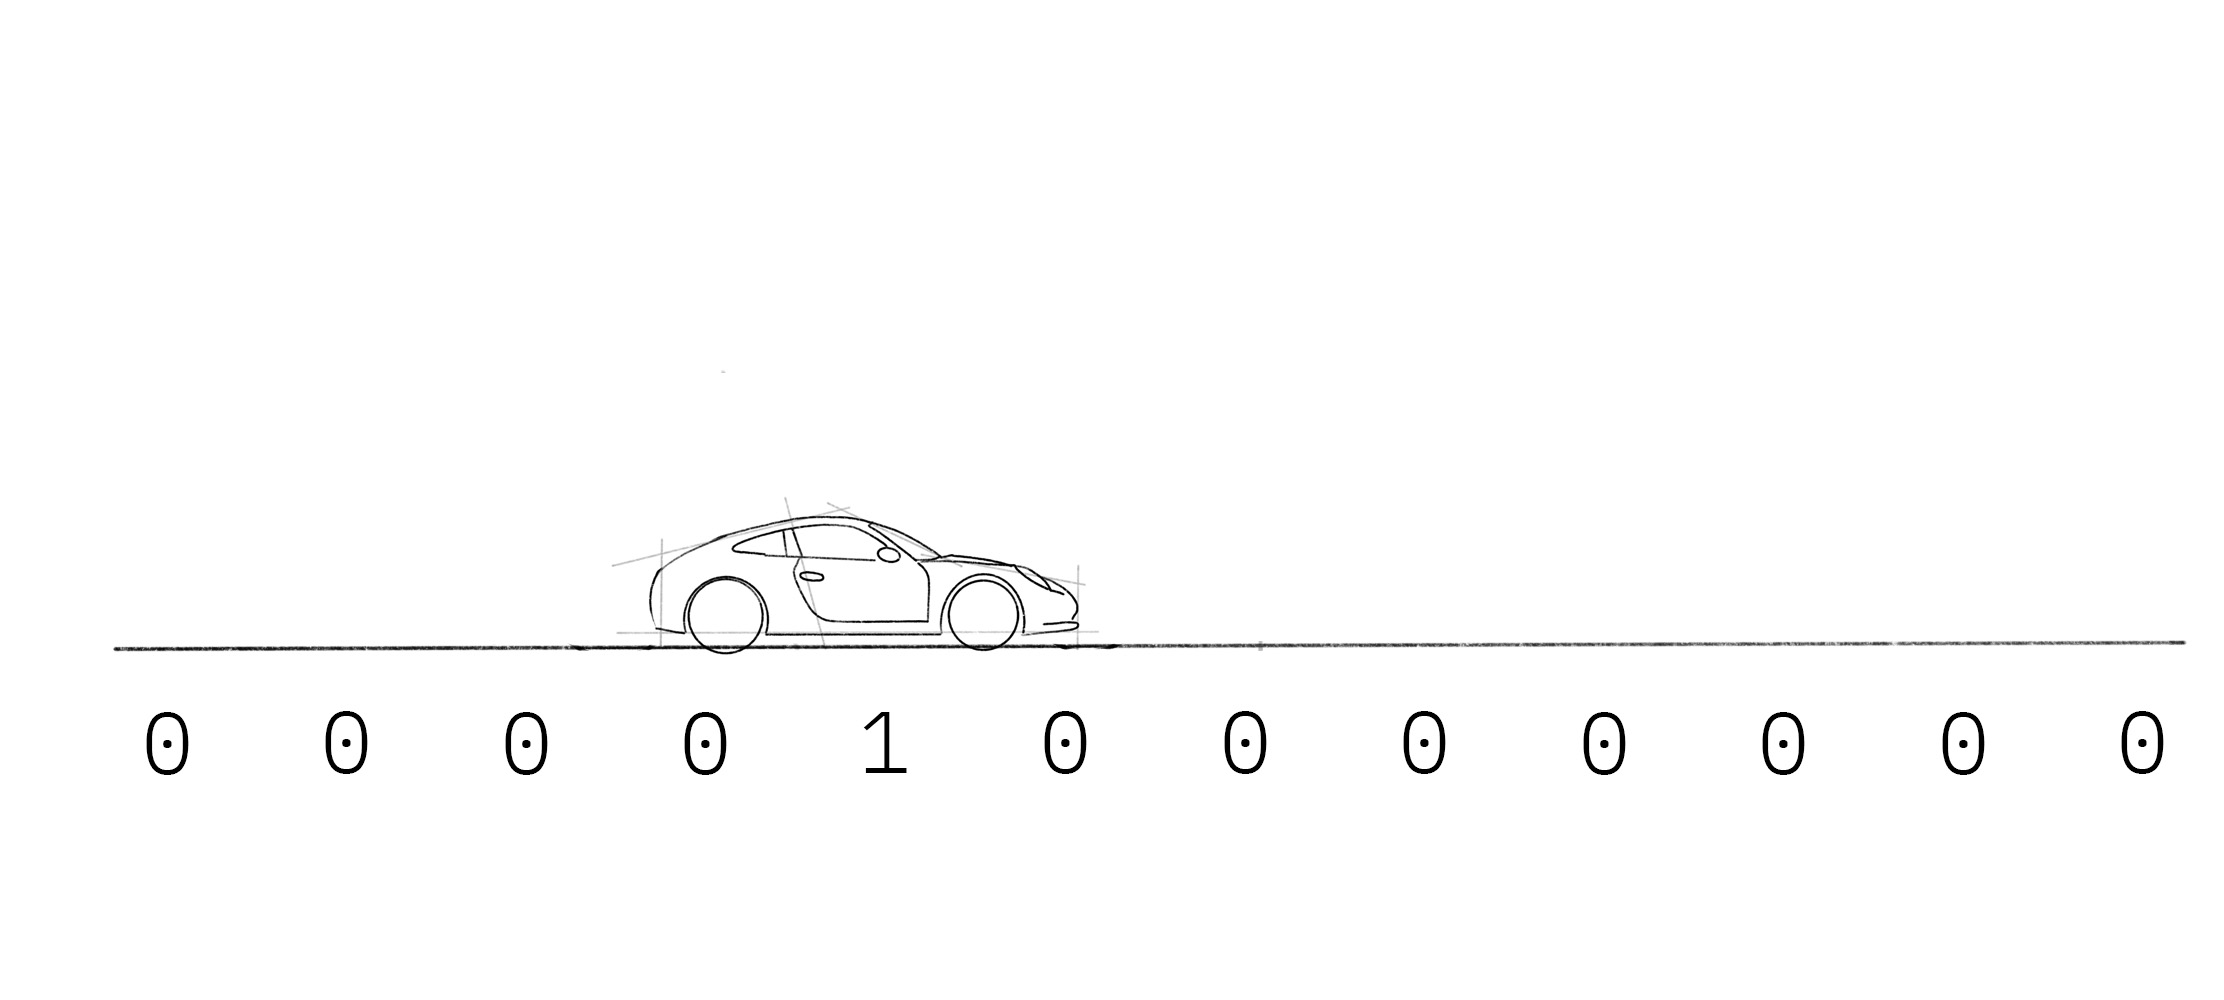 

*" Alternatively, we could instead use a collection of numbers in a vector called a statevector. Each element in the statevector contains the probability of finding the car in a certain place (...) "*

|x >  = \begin{bmatrix} 0\\ \vdots \\ 0 \\ 1 \\ 0 \\ \vdots \\ 0 \end{bmatrix} \begin{matrix} \ \leftarrow \end{matrix} \begin{matrix} \ \text{Probability of} \\ \text{car being at} \\ \text{position 4} \end{matrix}

*" This isn’t limited to position, we could also keep a statevector of all the possible speeds the car could have, and all the possible colours the car could be. With classical systems (like the car example above), this is a silly thing to do as it requires keeping huge vectors when we only really need one number. But as we will see in this chapter, statevectors happen to be a very good way of keeping track of quantum systems, including quantum computers. "*



### Qubit Notation

In classical computation the basic units of compute are bits. Bits can only be represented as a 0 or 1. This is called a binary rtepresentation of computation. In quantum computing we are not constrained by this limitation. The actual computation in a quantum computing is done in a high dimensional space of vectors/tensors, and when we want or need to know the result of a particular compute process, or a circuit design, we need to make a measurement to extract the output of that process. Only then we are presented with also a binary representation of 0s or 1s, which represent what in quantum physics is called a *collapse of the wavefunction*. For the moment we don't need to be concerned about these *wavefunction collapses* in order to proceed.

We need to understand that the measurement procedure only give us a probability outcome. The actual qubit state is not in all *facts* that particular measurement outcome. The actual quantum system continues to a more complex set of states other than waht we measure. But what we measure is considered *for all practical purposes* the state of the quantum system. As stated in the Qiskit textbook: *" As we saw in the last section, it is possible to prepare a qubit in a state for which it definitely gives the outcome 0 when measured."*  

*" We need a name for this state. Let's be unimaginative and call it  0. Similarly, there exists a qubit state that is certain to output a 1. We'll call this 1. These two states are completely mutually exclusive. Either the qubit definitely outputs a 0, or it definitely outputs a 1. There is no overlap. One way to represent this with mathematics is to use two orthogonal vectors."* :



|0\> = \begin{bmatrix} 1 \\ 0 \end{bmatrix}   |1\> = \begin{bmatrix} 0 \\ 1 \end{bmatrix}. 

The representation above is what we call the qubit notation and it is the standard scientific practice notation. It derives from the **Dirac notation**, named by physicist **Paul Dirac**, and the representation above describes a *ket* 0 and a *ket* 1. The other part of the notation could describe what is called a *bra* 0 or a *bra* 1. For this reason it is also called the *BraKet* notation. The *bra* is represented as the *ket* inverted, but it actually is a row vector representation (<0| or <1|). The *ket* is a column vector representation. So, those numbers are vectors (or tensors of rank 1).

A good quote from the Qiskit textbook about these vector representations. (Note that they are not the same as the vector representations we learn at high school basic calculus lessons): 

*" If you are not familiar with vectors, you can essentially just think of them as lists of numbers which we manipulate using certain rules. If you are familiar with vectors from your high school physics classes, you'll know that these rules make vectors well-suited for describing quantities with a magnitude and a direction. For example, the velocity of an object is described perfectly with a vector. However, the way we use vectors for quantum states is slightly different to this, so don't hold on too hard to your previous intuition. It's time to do something new! "*

With this notation we can represent more complex qubit states than the basic |0> or |1>. For example:

|q_0\> = \begin{bmatrix} \tfrac{1}{\sqrt{2}} \\ \tfrac{i}{\sqrt{2}} \end{bmatrix} .

*" To understand what this state means, we'll need to use the mathematical rules for manipulating vectors. Specifically, we'll need to understand how to add vectors together and how to multiply them by scalars. "*

This |q_0> state can be represented as a linear combination of the former |0> and |1>. This is so because |0> and |1> form an important algebra set of vectors: an orthonormal basis. With an orthonormal basis we can represent any other vector from a high-dimensional space, with any complexity as we like or need:

|q_0\> = \begin{matrix}\tfrac{1}{\sqrt{2}}|0\ >  \end{matrix}  + \begin{matrix} \tfrac{i}{\sqrt{2}}|1\ > \end{matrix}

*" This vector,  |q0⟩ is called the qubit's statevector, it tells us everything we could possibly know about this qubit. For now, we are only able to draw a few simple conclusions about this particular example of a statevector: it is not entirely |0⟩ and not entirely |1⟩. Instead, it is described by a linear combination of the two. In quantum mechanics, we typically describe linear combinations such as this using the word 'superposition'. "*

*" Though our example state  |q0⟩  can be expressed as a superposition of  |0⟩  and  |1⟩ , it is no less a definite and well-defined qubit state than they are. To see this, we can begin to explore how a qubit can be manipulated. "*



### Exploring Qubits with Qiskit

We are now going to start exploring qubits operations in Qiskit. For that we need to import all the relevant libraries:

In [3]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

Using the *QuantumCircuit* object to store circuits in **Qiskit**, we can create circuits. This object is basically a list of operations on our circuit and the qubits they are applied to.

In [4]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit

From the textbook: *" In our quantum circuits, our qubits always start out in the state  |0⟩ . We can use the initialize() method to transform this into any state. We give initialize() the vector we want in the form of a list, and tell it which qubit(s) we want to initialise in this state: "*

In [5]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw()  # Let's view our circuit

┌─────────────────┐
q_0: ┤ initialize(0,1) ├
     └─────────────────┘

After the initialization we need a simulator to be setup in order to view the resulting state of our qubit. We begin with the *statevector simulator*. 

In [6]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit


Next we use the *execute* object to run our circuit The arguments for this method will be the backend and the circuit. We then apply the *.result()* method to extract the result:

In [7]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
result = execute(qc,backend).result() # Do the simulation, returning the result

*" from result, we can then get the final statevector using .get_statevector()"* method:



In [8]:
output_state = result.get_statevector()
print(output_state) # Display the output state vector

[0.+0.j 1.+0.j]


The *q.measure()* method allow us to measure the result as we would in a real quantum computer and check the result:

In [9]:
qc.measure_all()
qc.draw() 

┌─────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0,1) ├─░─┤M├
        └─────────────────┘ ░ └╥┘
meas: 1/═══════════════════════╩═
                               0

*" This time, instead of the statevector we will get the counts for the 0 and 1 results using .get_counts():* "

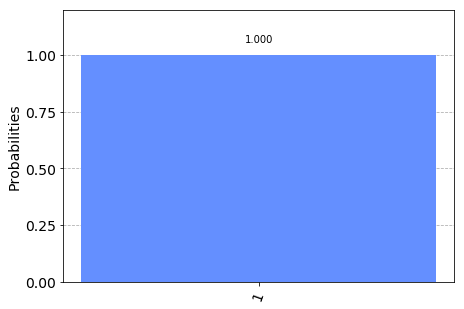

In [10]:
result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)

*" We can see that we (unsurprisingly) have a 100% chance of measuring  |1⟩ . This time, let’s instead put our qubit into a superposition and see what happens. We will use the state  |q0⟩  from earlier in this section: *"

|q_0\> = \begin{matrix} \tfrac{1}{\sqrt{2}}|0\ >  \end{matrix} + \begin{matrix} \tfrac{i}{\sqrt{2}}|1\ >  \end{matrix} .

Using the **Python** module *complex* we can now add the complex number results into a list datatype, with its norma real and complex parts displayed: 

In [11]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0> 

*" And we then repeat the steps for initialising the qubit as before: "*. And we plot the respective histogram of the results.



In [12]:
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialise the 0th qubit in the state `initial_state`
state = execute(qc,backend).result().get_statevector() # Execute the circuit
print(state)           # Print the result

[0.70710678+0.j         0.        +0.70710678j]


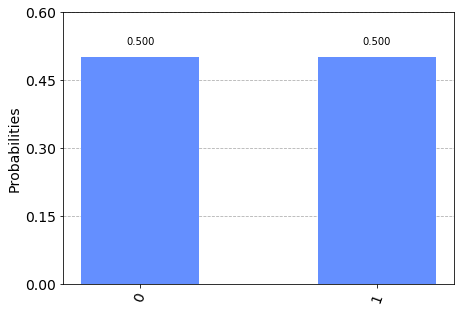

In [13]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

*" We can see we have equal probability of measuring either  |0⟩  or  |1⟩ . To explain this, we need to talk about measurement. *"

